In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import laplace


In [2]:
hospital_a = pd.read_csv('data/hospital_A.csv')
hospital_b = pd.read_csv('data/hospital_B.csv')
income = pd.read_csv('data/income.csv')

# k-anonymity

## Problem 1

If Alice visited both hospitals, and she is 28, can you deduce Alice’s medical condition from the combination of the two datasets?

In [3]:
hospital_a.columns = hospital_a.columns.str.replace(' ', '')
hospital_b.columns = hospital_b.columns.str.replace(' ', '')

In [4]:
hospital_b[hospital_b['age'] == ' < 35']

,zipcode,age,nationality,condition
0,606**,< 35,*,COVID
1,606**,< 35,*,Tuberculosis
2,606**,< 35,*,Flu
3,606**,< 35,*,Tuberculosis
4,606**,< 35,*,Cancer
5,606**,< 35,*,Cancer


In [5]:
hospital_a[hospital_a['age'] == ' < 30']

,zipcode,age,nationality,condition
0,606**,< 30,*,COVID
1,606**,< 30,*,Heart Disease
2,606**,< 30,*,Viral Infection
3,606**,< 30,*,Viral Infection


Since Alice's age would be "< 35" in the hospital A dataset, and "< 30" in the hospital B dataset, depending on the timeframe that each hospital was visited in, her condition could be determined. There is only one patient in each dataset who was being treated for COVID, which could be Alice. The combined dataset does not satisfy k-anonymity. 

## Problem 2

Based on your answer to the previous question, does the combined dataset still satisfy k-anonymity?

This does not satisfy k-anonymity anymore. If anyone looking at both datasets with the information provided above, Alice's condition could be deduced. She is no longer indistinguishible from any other patient. 

# Randomized Response

## Problem 3

The origin of differential privacy is in randomized response. In a randomized response protocol, the person taking a survey is asked to privately flip a coin. If the coin lands on heads, then the person should answer the yes or no question truthfully. If the coin lands on tails, then the person should privately flip the coin again and respond yes if heads and no if tails.

## Problem 4

Write a program to simulate this process with a population of 1000 people. Run the simulation 100 times where the percentage of people for whom the true answer to the survey question is yes is 1%, 10%, 25% and 50%. For example, if the percentage is 1%, then there should be 10 people whose true answer is yes. You can use methods such as numpy.random.choice to generate the actual answers based on the coin flips (for this question consider the coin to be fair with probability of 0.5 of flipping heads or tails). We provide you with some skeleton code to help you get started.

In [6]:
def simulate(percentage, n_pop=1000, coin_prob=0.5): # assign default values
    # fill in your code here

    pop_answers = np.zeros(n_pop, dtype = int)
    pop_answers[range(int(n_pop * percentage))] = 1


    randomized = []
    
    for answer in pop_answers:
        coin_flip = np.random.choice([1, 0], p = [coin_prob, 1-coin_prob])
        #1 is heads 0 is tails, 
        if coin_flip == 1:
            #if heads append the answer
            randomized.append(answer)
        else:
            #otherwise flip again and append either yes for heads or tails for no
            randomized.append(np.random.choice([1,0]))
       
    return np.mean(randomized)

# a list containing the simulation result for each percentage
simulations = []

# iterate over different percentages
for percentage in [0.01, 0.1, 0.25, 0.5]:
    # simulate result for the current percentage
    simulation = []
    # simulate 100 times
    for _ in range(100):
        # run the simulate function and add the result to list
        proportion = simulate(percentage)
        simulation.append(proportion)
    # add the simulation result to the simulations list
    simulations.append(simulation)

## Problem 5

For each percentage, plot a histogram with the x-axis being the proportion of yes responses and y-axis being the number of runs. Also compute the expected probability of answering yes for each percentage. What do you notice about the distribution in relation to the probability you just computed? Write a few sentences describing what you see.

In [7]:
def calc_ep(percentage, p = 0.5, q = 0.5): #assuming fair coin
    e = p*percentage + (1-p)*q
    return e

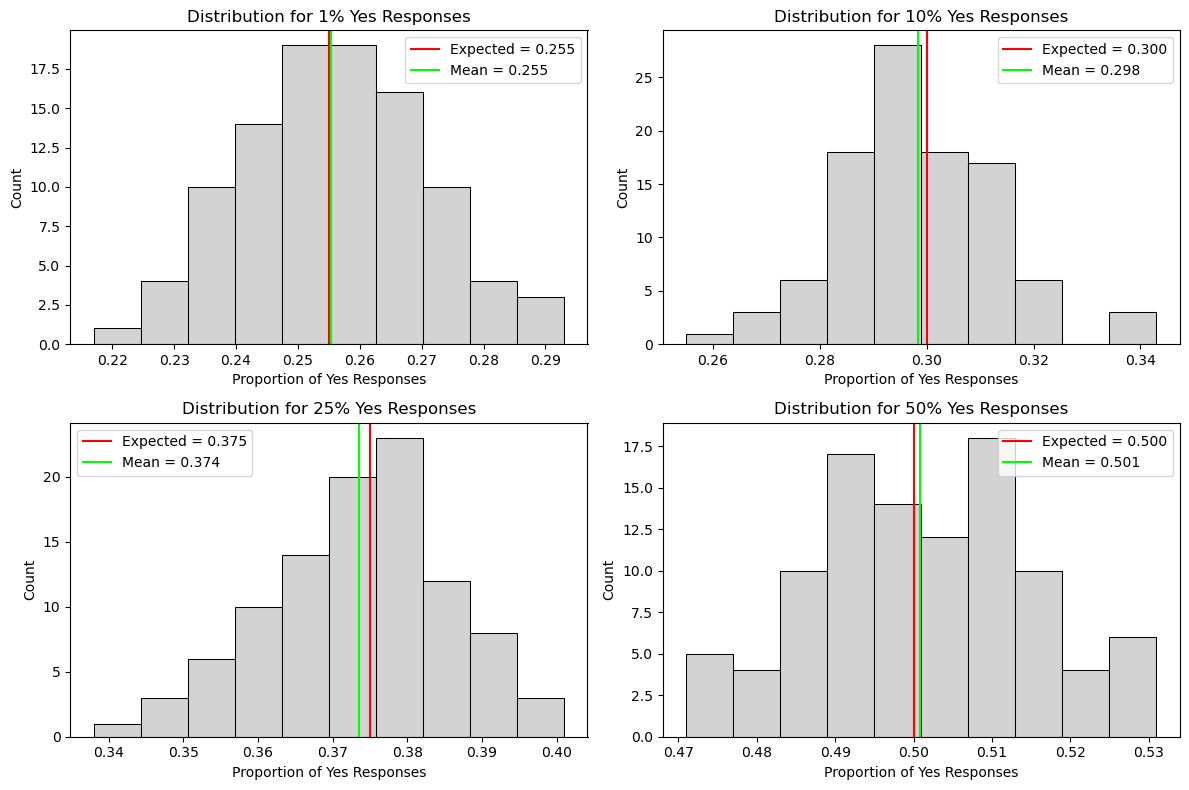

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  
axes = axes.flatten() 

for idx, (sim, prop) in enumerate(zip(simulations, [0.01, 0.1, 0.25, 0.5])):
    ax = axes[idx]
    expected = calc_ep(prop)
    ax.hist(sim,color='lightgray', edgecolor='black', linewidth=0.75)
    ax.axvline(expected, color='red', label=f'Expected = {expected:.3f}')
    ax.axvline(np.mean(sim), color='lime', label=f'Mean = {np.mean(sim):.3f}')
    ax.set_xlabel('Proportion of Yes Responses')
    ax.set_ylabel('Count')
    ax.set_title(f'Distribution for {int(prop * 100)}% Yes Responses')
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()

The expected probabilities are higher than the mean probabilties in the histograms. Aside from the distribution where the proportion of yeses is 0.5, none of the expected probabilities are close to the mean of the distribution. The mean also increases and approaches the expected values as the proportion of yeses increases. 

## Problem 6

In the randomized response, the coin flip was parameterized with probability 0.5 of answering truthfully. Try biasing the coin so that the probability of deciding to not answer truthfully is 0, 0.125, 0.25, and 0.5. Run the simulation again this time choosing the percentage of true yes answers equal to 0.25, and make histograms similar to the ones made in the previous question. Note that the probability of responding yes given a decision to produce a fake answer (when the first coin lands on tail) should still be 0. Note: tou should reuse the simulate function you wrote earlier (notice the function parameters include everything you need to vary!)

In [9]:
cfs = [0,0.125, 0.25, 0.5]
cfs_true = [1-i for i in cfs]
sim_cfs = []
percentage = 0.25
# iterate over different percentages
for i in cfs_true:
    simulation = [simulate(percentage, coin_prob = i) for _ in range(100)]
    sim_cfs.append(simulation)


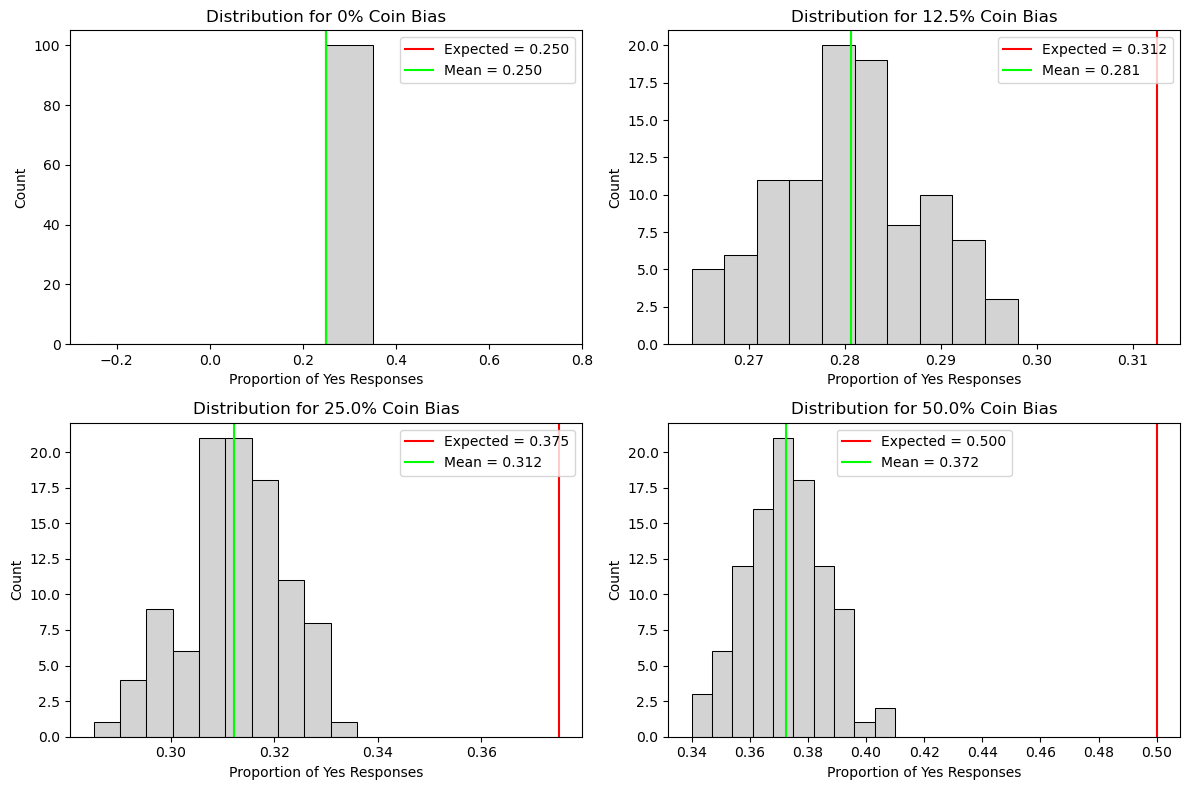

In [10]:
fig2, axes2 = plt.subplots(2, 2, figsize=(12, 8))  
axes2 = axes2.flatten() 

for idx, (sim, prop) in enumerate(zip(sim_cfs, cfs)):
    ax = axes2[idx]
    expected = calc_ep(prop)
    ax.hist(sim,color='lightgray', edgecolor='black', linewidth=0.75)
    ax.axvline(expected, color='red', label=f'Expected = {expected:.3f}')
    ax.axvline(np.mean(sim), color='lime', label=f'Mean = {np.mean(sim):.3f}')
    ax.set_xlabel('Proportion of Yes Responses')
    ax.set_ylabel('Count')
    ax.set_title(f'Distribution for {prop * 100}% Coin Bias')
    ax.legend()

plt.tight_layout()
plt.show()

## Problem 7

Do you notice any pattern in the histograms? Specifically, as the coin probability decreases from 0.5 to 0, how does the distribution change?

As the coin probability decreases, the mean of the distribution decreases and approaches the expected value. The variance of the distribution also decreases and approaches zero when all of the responses are yes. 

## Problem 8 
Calculate the standard deviation of each simulation's distribution (of the proportion of yes responses). How does the standard deviation change?

In [11]:
standard_devs = [np.std(i) for i in sim_cfs]
[f'Coin Bias = {a}: Standard Deviation: {b}' for a,b in zip(cfs, standard_devs)]

['Coin Bias = 0: Standard Deviation: 0.0',
 'Coin Bias = 0.125: Standard Deviation: 0.007532721951592251',
 'Coin Bias = 0.25: Standard Deviation: 0.009569592467811791',
 'Coin Bias = 0.5: Standard Deviation: 0.013508290047226564']

The standard deviations also decrease as the coin bias approaches zero. 

# Laplace Mechanism


Differential privacy is a definition, rather than a technique. The randomized response you saw in Question 1 is an example of a technique that satisfies (ln(3), 0) differential privacy. Another common method for achieving differential privacy is the Laplace mechanism.

The Laplace mechanism is a method for achieving differential privacy. While randomized response is distributed, in that the data aggregator finds out about only the noisy data, the Laplace mechanism is centralized. The Laplace mechanism is meant for a scenario in which a data aggregator already has the "true" data, but wants to release the results of queries without violating the privacy of whose data it controls. It does this by adding random noise to the output of these queries. The noise in this case is sampled from the Laplace distribution, hence the name.

The key to the Laplace mechanism is the scale of the distribution the noise is sampled from. The scale of the distribution is the "spread"--how large the standard deviation is and how likely you are to see significant outliers. A scale that is larger means that on average there will be more noise (and more privacy), whereas a scale that is closer to 0 will be closer to the original value (and therefore less private). With the Laplace mechanism, the scale is set as the sensitivity of the query over epsilon. Recall that smaller epsilon implies more privacy, and a larger epsilon implies less privacy.

What is the sensitivity of a query? For our purposes, we can just think of a query as a function that takes data and produces a numerical answer. The sensitivity of the query is the maximum amount that the query can differ if you give it data that is modified in a single entry. For example, let's say we want to count the number of entries in a vector that are greater than 12.6.


In [12]:
def query(array): # our query
    return sum(array > 12.6)

Then think about two hypothetical databases (which we can think of right now as just vectors). These databases (vectors) are neighbors meaning that they differ in exactly one entry. x and y in the cell below are examples of one such set of neighboring databases.

In [13]:
import numpy as np

x = np.array([0, 15, 26, 35, -10, 12])
y = np.array([12.7, 15, 26, 35, -10, 12])

In [14]:
abs(query(x) - query(y))

1

Crucially, the most that the output of this query could be altered given any database z is by taking an entry of z that is above 12.6 to be below 12.6, or taking an entry below 12.6 to be above 12.6. In either case, this would only change the output of the query by at most 1, so the sensitivity of this query is 1. Therefore, the Laplace mechanism would add to the output of this query a value drawn from a Laplace distribution with scale 1/eps.

## Problems 9 & 10

Now, suppose we have a counting query that counts the number of people answering yes to the survey as in the previous question (but without the random response, so it's simply the number of truthful "yes" answers). What is the sensitivity of this query? Implement the Laplace mechanism for this query with your specified sensitivity, by adding noise drawn from the Laplace distribution to the output count. Like you did previously, construct a population with percentage of true yes answers equal to 0.25, and run the simulation (100 runs each) for epsilon values 10, 1, 0.1 and 0.01. You can generate Laplacian noise through the `laplace.rvs` function.

Plot the distribution of laplace count for each of the four epsilon values using a boxplot.

The sensitivity of this query is 1. 

In [15]:
def laplace_count(arr, epsilon):
    # fill in your code here
    # Given a list of survey responses and an epsilon value, 
    # return the noisy count of yes responses
    count_yeses = sum(arr)
    sensitivity = 1 
    scale = sensitivity/epsilon
    noise = laplace.rvs(scale=scale)
    noisy = count_yeses + noise
    return noisy

# construct the arr list, 
# run simulations by calling laplace_count 100 times for each epsilon 

# plot

In [16]:
epsilons = [10, 1, 0.1, 0.01]
percentage = 0.25
npop = 1000
nsims = 100
population = np.zeros(npop, dtype = int)
population[range(int(npop * .25))] = 1

distribution = [[laplace_count(population, epsilon) for i in range(nsims)] for epsilon in epsilons]


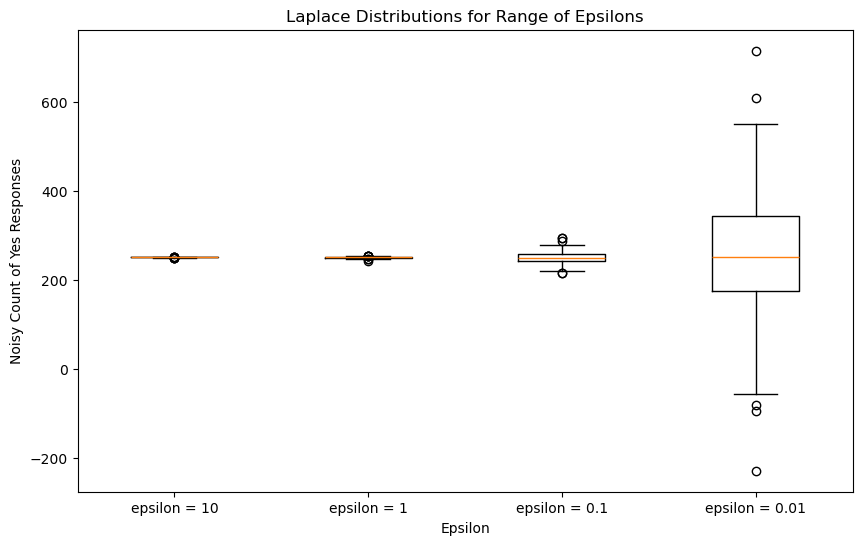

In [17]:
plt.figure(figsize=(10, 6))
plt.boxplot(distribution, labels = [f'epsilon = {e}' for e in epsilons])
plt.title('Laplace Distributions for Range of Epsilons')
plt.xlabel('Epsilon')
plt.ylabel('Noisy Count of Yes Responses')
plt.show()

## Problem 11

Examine the graph you just made. What do you notice about the distribution of answers as epsilon decreases? What happens when epsilon is quite small (e.g. less than 0.01?) Does this pose any problems?

The distribution seems to spread out more as epsilon decreases since much more noise is being added when epsilon is very small. When epsilon is smallest (0.01), there are many more outliers than when epsilon is the largest (10). While this might help with anonymity, it could mean that it could be harder to obtain meaningful results when too much noise is added. There is likely a sweet spot for epsilons in every distribution.

## Problem 12

Compute the average laplace count (over 100 runs) for each epsilon. How much do they differ from the true count of the population? What is the standard deviation for each epsilon? What does this suggest about repeated queries under the differential privacy framework? How can a data curator/aggregator defend against repeated queries?

In [18]:
std_dist = np.std(distribution, axis = 1)
mean_dist = np.mean(distribution, axis = 1)
count_yes = np.sum(population)
diff_dist = [abs(count_yes - i) for i in mean_dist]

# print('Means:', [f"epsilon = {e}: {i}" for e, i in zip (epsilons, mean_dist)])
[f"standard deviation: epsilon = {e}: {i}" for e, i in zip(epsilons, std_dist)], [f"difference: epsilon = {e}: {i}" for e, i in zip(epsilons, diff_dist)]
      
    #   Standard Deviations: {[f"Epsilon = {e}: {i}"  for e, i in zip (epsilons, std_dist)]}, 
      
    #   Difference in yes counts: {[f"Epsilon = {e}: {i}"  for e, i in zip (epsilons, diff_dist)]}')

(['standard deviation: epsilon = 10: 0.13975274754677394',
  'standard deviation: epsilon = 1: 1.480642650372188',
  'standard deviation: epsilon = 0.1: 14.230942550574959',
  'standard deviation: epsilon = 0.01: 158.75679556387473'],
 ['difference: epsilon = 10: 0.0023300618576058696',
  'difference: epsilon = 1: 0.037894356679174734',
  'difference: epsilon = 0.1: 0.28036348234422803',
  'difference: epsilon = 0.01: 0.6181656641477105'])

As epsilon decreases, the standard deviation increases. The differences between the distribution of true counts and the laplace counts also increases and the distribution gets noisier as epsilon decreases. This suggests that repeated queries lead to noisier data and lessen privacy which makes it easier for bad actors to infer sensitive information. To guard against repeated queries, the number of queries can be restricted and adjust the amount of noise added. 

## Problems 13 and 14

Counting is useful, but sometimes we also need answers to other questions like mean and median. Implement the Laplace mechanism for computing the mean of a real valued array. For this you will need to derive the sensitivity of the mean. That is, how much a query may vary given a difference of one entry. To do this, you will need to add as a parameter the allowable range of the list -- the maximum and minimum values that are allowable.

You should think carefully about how to handle data that is out of the specified range. Specifically, if you drop data outside of the range, how would that affect the sensitivity analysis? Could this inadvertently reveal information meant to remain private? Is there a better way to handle data that avoids these problems?

In [19]:
def laplace_mean(arr, epsilon, min_val, max_val):
    clipped_arr = np.clip(arr, min_val, max_val)
    true_mean = np.mean(clipped_arr)
    sensitivity = (max_val - min_val) / len(clipped_arr)
    scale = sensitivity / epsilon
    noise = laplace.rvs(scale = scale)
    noisy = true_mean + noise
    return noisy

Dropping data outside of the range changes the size of the dataser and the sensitivity of the mean, which could introduce bias. It could also reveal which points were outside of the range and how close they were to the boundaries of the range. A better way to approach this would be clipping the data to a specific range since this ensures that all of the data stays within the range without revealing if any points were out of bounds originally.  

## Problem 15

Using the `age` column in the income data set (``income.csv"), plot the average difference between the true mean age and the differentially private mean age over 100 runs for feasible points in the grid formed by minimum and maximum age, using epsilon = 0.1.

In [20]:
import pandas as pd
df = pd.read_csv("data/income.csv")
age = df["age"]
true_mean_age = np.mean(age) # true mean age

ages = [17, 20, 30, 40, 50, 60, 70, 80, 90]
grid = [(x, y) for x in ages for y in ages]
feas_grid = [pt for pt in grid if pt[0] < pt[1]]

indexer = {ages[i] : i for i in range(len(ages))}

data = np.full((len(ages), len(ages)), None, dtype = float)

epsilon = 0.1
nruns = 100
for pt in feas_grid:
    #  You should pass minimum age and manixum age 
    #       when calling laplace_mean function
    min_age, max_age = pt

    i = indexer[min_age]
    j = indexer[max_age]

    diffs = []
    for k in range(nruns):
        noisy = laplace_mean(age, epsilon, min_age, max_age)
        diff = abs(noisy - true_mean_age)
        diffs.append(diff)
    data[i,j] = np.mean(diffs)


    # fill in the code here and assign data[i, j]
    # data[i, j] should be the average difference between 
    # the true mean age and the differentially private 
    # mean age over 100 runs

    

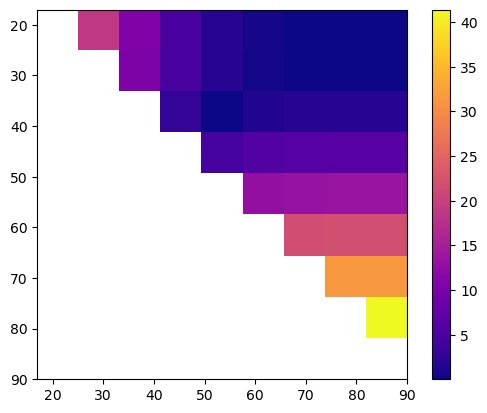

In [21]:
plt.imshow(data, extent = [age.min(),age.max(),age.max(),age.min()], cmap = 'plasma')
plt.colorbar()
plt.show()

## Problem 16

Look at magnitude and direction of the error in the plot. What does this suggest about choosing reasonable cutoffs when handling differentially private data? How might one go about minimizing this sort of error? To interpret the graph it may be useful to also plot a histogram of ages in the dataset.

The largest differences occur at the extreme ends of the distribution. The smallest differences happen in the middle of the distribution. This could mean that at the extreme ends of the dataset where values occur less frequently, more noise is added to achieve privacy. This may distort the data, so cutoffs should be chosen with this in mind. Removing outliers might help to minimize error. 

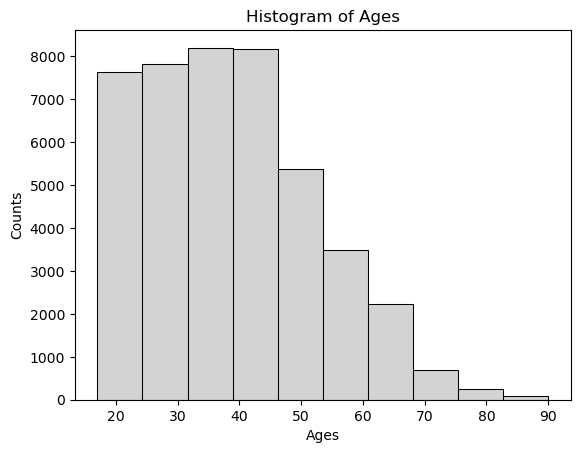

In [22]:
plt.hist(age,color='lightgray', edgecolor='black', linewidth=0.75)
plt.xlabel('Ages')
plt.ylabel('Counts')
plt.title('Histogram of Ages')
plt.show()